In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

## Data Processing
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

## Machine Learning Algos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

##
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
data = load_breast_cancer()

df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']

df.head()

X = df.drop('target', axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

# KNN

In [2]:
knn_pipe = Pipeline([('sscaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())])

knn_params = {'knn__n_neighbors': [2,3,4,5]}

knn_grid = GridSearchCV(estimator=knn_pipe, 
                          param_grid=knn_params, 
                          scoring='accuracy', 
                          cv=5)

knn_grid.fit(X_train, y_train)
knn_grid.score(X_test, y_test)

0.9824561403508771

In [378]:
knn_pipe = Pipeline([('pca', PCA()),
                 ('knn', KNeighborsClassifier())])

knn_params = {'pca__n_components': [5,10,15,20],
                'knn__n_neighbors': [2,3,4,5]}

knn_grid = GridSearchCV(estimator=knn_pipe, 
                          param_grid=knn_params, 
                          scoring='accuracy', 
                          cv=5)

knn_grid.fit(X_train, y_train)
knn_grid.score(X_test, y_test)

0.9122807017543859

# Decision Tree

In [348]:
tree = DecisionTreeClassifier()

tree_params = {'criterion': ['entropy', 'gini'],
              'max_depth': np.linspace(0.1, 0.5, 5, endpoint=True),
              'max_features': [x for x in range(15,30)]}


tree_grid = GridSearchCV(estimator=tree, 
                          param_grid=tree_params, 
                          scoring='accuracy', 
                          cv=5)

tree_grid.fit(X_train, y_train)
tree_grid.score(X_test, y_test)

0.6993006993006993

# Random Forest

In [350]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid = GridSearchCV(estimator=rf, 
                          param_grid=rf_params, 
                          scoring='accuracy', 
                          cv=5)

rf_grid.fit(X_train, y_train)
rf_grid.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.986013986013986

# AdaBoosting

In [354]:
ada = AdaBoostClassifier()

ada_params = {'base_estimator': [DecisionTreeClassifier(max_depth=1), 
                                 DecisionTreeClassifier(max_depth=2),
                                DecisionTreeClassifier(max_depth=3)],
             'n_estimators': [20,30,50],
             'learning_rate' : [0.1,0.3,0.4]}

ada_grid = GridSearchCV(estimator=ada, 
                          param_grid=ada_params, 
                          scoring='accuracy', 
                          cv=5)

ada_grid.fit(X_train, y_train)
ada_grid.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.993006993006993

# Gradient Boosting

In [373]:
gbt = GradientBoostingClassifier()

gbt_params = {'learning_rate' : [0.1,0.3,0.4],
                 'max_features' : [5,10,15],
                 'max_depth' : [2,3,5]}

gbt_grid = GridSearchCV(estimator=gbt, 
                          param_grid=gbt_params, 
                          scoring='accuracy', 
                          cv=5)

gbt_grid.fit(X_train, y_train)
gbt_grid.score(X_test, y_test)

1.0

# XG Boost

In [365]:
xg = xgb.XGBClassifier()

xg_grid = {
    "learning_rate": [0.1,0.3,0.4],
    'max_depth': [2,3,4,5],
    'min_child_weight': [2,4,6,8],
    'subsample': [ 0.3,0.4,0.5],
    'n_estimators': [5, 30, 100, 250],
}

xg_grid = GridSearchCV(xg, 
                       xg_grid, 
                       scoring='accuracy', 
                       cv=5, n_jobs=1)

xg_grid.fit(X_train, y_train)
xg_grid.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.972027972027972

**Please report your best performing model**
This report should include:
1. The name of the algorithm
2. The parameters used for that model
3. A classification report
4. A confusion matrix (ideally as a heatmap)
5. An interpretation of classification metrics

In [4]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in predicted and true values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    
    import seaborn as sns
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat, average = 'weighted')
    recall = recall_score(y, y_hat, average = 'weighted')
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      1.00      0.98        31

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

Accurancy:  0.9824561403508771


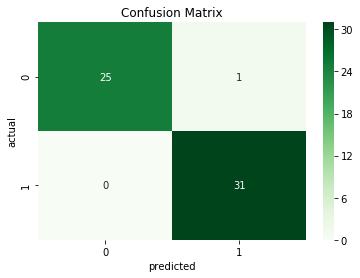

In [7]:

y_hat = knn_grid.predict(X_test)
evaluation(y_test, y_hat)